# Multiple Linear Regression

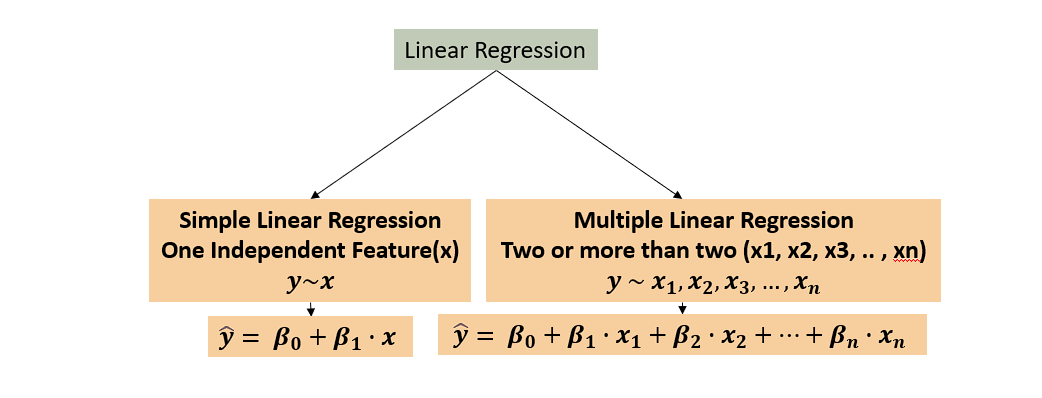

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [3]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Perfom basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

0

### PROFIT ~ RND, ADMIN, MKT
### PROFIT_pred = B0 + B1xRND + B2xMKT + B3xMKT

### Seperate X and Y(PROFIT)

In [7]:
X = df[['RND', 'ADMIN', 'MKT']]
Y = df[['PROFIT']]

In [8]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Creating a Linear Regression model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

### Check r2 score for the model

In [11]:
model.score(X, Y)

0.9507459940683246

### Get coefficents and intercept for the above model

In [12]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [13]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [14]:
model.intercept_

array([50122.19298987])

### PROFIT_pred = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT

### 3 conclusions
1. if RND increases by 1000 , profit increase by 805.7 
2. if ADMIN increase by 1000 , profit will decrease by 26.8
3. if MKT increase by 1000 , profit will increase by 27.2 
4. More the budget invested in RND, Higher the impact on profit 

### Predict the estimated results for X by the model

In [16]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [17]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Evalualting the model

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [18]:
mse = mean_squared_error(Y,ypred)
mse

78417126.01913083

In [19]:
rmse = mse**(1/2)
rmse

8855.34448901514

In [20]:
mae = mean_absolute_error(Y, ypred)
mae

6471.4503961048085

In [22]:
mape = mean_absolute_percentage_error(Y, ypred)
mape

0.10601209160494125

In [23]:
r2 = r2_score(Y, ypred)
r2

0.9507459940683246

### Above results i get r2 score of 0.9507 which is very good >0.8 

### Predicting out of sample data

In [24]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [31]:
xnew = [[170000, 50000, 40000]]
pred = model.predict(xnew)
pred

array([[186842.07564784]])